In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Load data from the GitHub raw URL
url = "https://raw.githubusercontent.com/btenneson/public_projects/main/Cancer_Data2.csv"
data = pd.read_csv(url)


# Define the objective function to maximize the absolute correlation
def objective_function(bias, data):
    # Calculate synthetic scores
    synthetic_scores = data.iloc[:, 1:].dot(bias)
    
    # Correlation with the first column
    correlation = np.corrcoef(data.iloc[:, 0], synthetic_scores)[0, 1]
    
    # Minimize the negative absolute correlation
    return -abs(correlation)

# Initial guess for the bias vector (random values, no need to normalize)
n_minus_1 = data.shape[1] - 1  # Assuming data includes the first column
initial_bias = np.random.rand(n_minus_1)

# Minimization process
result = minimize(
    objective_function,
    initial_bias,
    args=(data,),
    method='Powell',
    options={'disp': True}
)

# Check results
if result.success:
    optimized_bias = result.x
    print("Optimized bias vector:", optimized_bias)
    print("Achieved correlation:", -result.fun)  # Negate to show maximized correlation
else:
    print("Optimization failed:", result.message)


Optimization terminated successfully.
         Current function value: -0.877796
         Iterations: 13
         Function evaluations: 3828
Optimized bias vector: [ 2.85155882e+02  1.19882463e+01  9.31772957e+00 -3.44600531e+00
 -8.23718360e+02 -1.76470649e+04  6.20544632e+03  1.39466239e+04
 -1.46318827e+03  2.12909161e+03  3.35036753e+03 -1.24104718e+02
 -3.79893077e+01 -1.17983437e+01  9.10041725e+04 -3.20318972e+03
 -2.02049481e+04  3.84695947e+04  6.55828363e+02  7.48411810e+03
  3.26258943e+02  5.00986123e+01  3.67983887e+00 -1.65938017e+00
  2.66174208e+03 -3.58204016e+01  2.87251174e+03  2.77226664e+03
  4.61496256e+03  1.52201461e+04]
Achieved correlation: 0.8777957693340018


In [2]:
len(optimized_bias)

30

In [3]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [4]:
# Objective function to maximize absolute correlation
def objective_function(bias, data):
    synthetic_scores = data.iloc[:, 1:].dot(bias)
    correlation = np.corrcoef(data.iloc[:, 0], synthetic_scores)[0, 1]
    return -abs(correlation)


In [5]:
# Assuming 'optimized_bias' is the bias vector obtained from optimization
synthetic_scores = data.iloc[:, 1:].dot(optimized_bias)


In [6]:
# Initialize the linear regression model
model = LinearRegression()

# The input X needs to be reshaped for fitting with sklearn (single feature)
X = synthetic_scores.values.reshape(-1, 1)  # Predictor - synthetic scores
y = data.iloc[:, 0].values  # Response variable from the first column

# Fit the model
model.fit(X, y)

# Optional: Use the model to make predictions
predictions = model.predict(X)


In [7]:
# Calculate the R-squared value to assess the fit
r_squared = r2_score(y, predictions)
print("R-squared value of the fit:", r_squared)


R-squared value of the fit: 0.7705254126606722


In [8]:
# The classifier. Currently set to be triggered when the synthetic score is above 1/2
def classify_scores(score):
    return 1 if score > 0.5 else 0


In [9]:
data['Predicted'] = synthetic_scores.apply(classify_scores)


In [10]:
from sklearn.metrics import confusion_matrix, f1_score

# Actual values
y_true = data.iloc[:, 0].values  # assuming the first column contains the actual categorical labels

# Predicted values
y_pred = data['Predicted'].values

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Compute F1 score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)


Confusion Matrix:
 [[  0 357]
 [  0 211]]
F1 Score: 0.5417201540436457


In [11]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve


Confusion Matrix:
 [[  0 357]
 [  0 211]]
F1 Score: 0.5417201540436457
Accuracy: 0.3714788732394366
Precision: 0.3714788732394366
Recall: 1.0
AUC: 0.9969068195998778


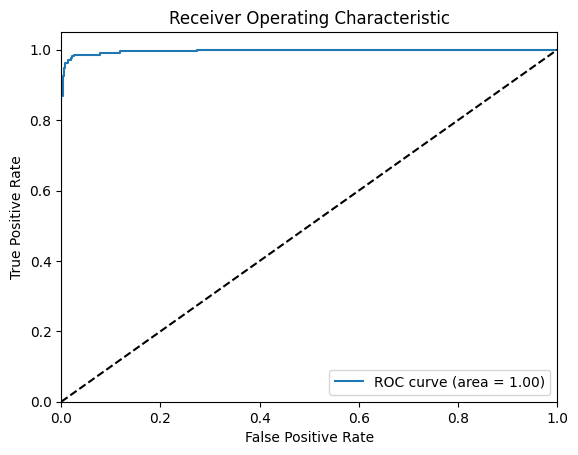

In [12]:
# Assuming 'y_true' and 'y_pred' are already defined as your actual and predicted labels respectively

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# F1 Score
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_true, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_true, y_pred)
print("Recall:", recall)

# AUC - using synthetic scores as proxy if probability scores not available
# Ensure 'synthetic_scores' is a 1D array with scores for each instance
if 'synthetic_scores' not in locals():
    synthetic_scores = data.iloc[:, 1:].dot(optimized_bias)  # Recalculate if not available
auc = roc_auc_score(y_true, synthetic_scores)
print("AUC:", auc)

# Optional: Plot ROC Curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y_true, synthetic_scores)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
